# Create Evaluation Metrics
- *Author*: Juan Cabanela
- *Start Date*: December 8, 2021

### Requirements

Requires the following python libraries:
- pandas
- numpy
- scikit-learn (sklearn)

This notebook should use similar metrics to those used to analyze the NB results to process any list of 'true' and 'predicted' labels.

### History
- **December 8, 2021**: First version whipped together before the presentation

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import pickle
import time
from sklearn import metrics

##
## Custom functions
##

##
## Define constants
##
DEBUG = False

# Location of data file to process
data_dir = "./"





Summary Classification Report
                 precision        recall      f1-score         support
bias          0.410         0.327         0.364                11031.0
clickbait     0.415         0.045         0.080                 8486.0
conspiracy    0.538         0.342         0.418                12646.0
fake          0.442         0.249         0.319                 8233.0
hate          0.390         0.072         0.121                 1286.0
junksci       0.585         0.109         0.184                 1829.0
political     0.321         0.778         0.454                11162.0
reliable      0.555         0.912         0.690                12402.0
satire        0.361         0.211         0.266                  769.0
state         0.228         0.249         0.238                 1888.0
unreliable    0.760         0.087         0.155                 3595.0

accuracy                                  0.431                       
macro         0.455         0.307         0.29

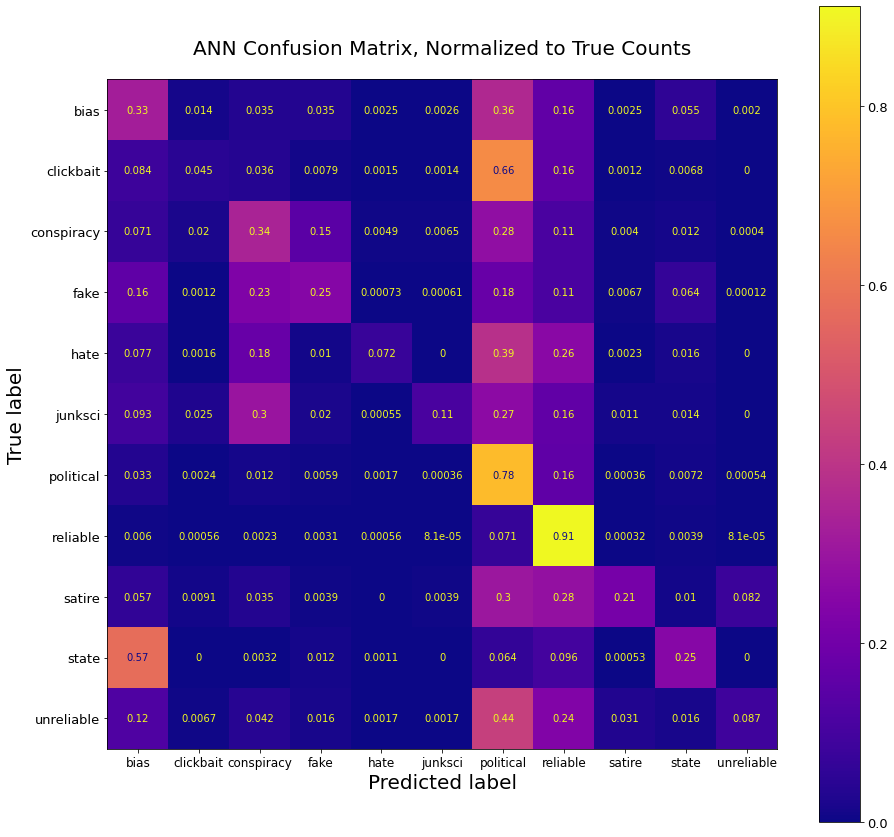

In [2]:
# Load datafile
prediction_results_csv = "ANNlabels.txt"

# labels used for ANN
labels = ["bias", "clickbait", "conspiracy", "fake", "hate", "junksci", "political", "reliable", "satire", "state", "unreliable"]
numlabels = []
for i, label in enumerate(labels):
    numlabels.append(i)

ANNdata_df = pd.read_csv(prediction_results_csv)
true_val = ANNdata_df['true']
predict_val = ANNdata_df['predicted']

# Track the various metrices for each fold
conf_mat = metrics.confusion_matrix(true_val, predict_val, labels=numlabels, normalize='true').ravel().reshape((len(numlabels), len(numlabels)))

# Statistics per label
label_precisions, label_recalls, label_f1s, label_support = metrics.precision_recall_fscore_support(true_val, predict_val, labels=numlabels, beta=1.0)

# Macro average means "Calculate metrics for each label, and find their unweighted mean.
# This does not take label imbalance into account."
accuracy = metrics.accuracy_score(true_val, predict_val)
recall = metrics.recall_score(true_val, predict_val, average='macro')
precision = metrics.precision_score(true_val, predict_val, average='macro')
f1 = metrics.f1_score(true_val, predict_val, average='macro')

# Display classification report (for last single classifier)
# print(metrics.classification_report(Test_Y, predict_val, target_names=le.classes_))

# Try to model classification report
print(f"Summary Classification Report")
print(f"{' ':12}  {'precision':>12}  {'recall':>12}  {'f1-score':>12}  {'support':>14}")

# Get averages and standard deviations for labels
for i, label in enumerate(labels):
    precision_str = f"{label_precisions[i]:04.3f}"
    recall_str = f"{label_recalls[i]:04.3f}"
    f1_str = f"{label_f1s[i]:04.3f}"
    support_str = f"{label_support[i]:6.1f}"
    print(f"{label:12}  {precision_str:12}  {recall_str:12}  {f1_str:12}  {support_str:>14}")
print("")

# Get macro values dumped
totsupport_str = f" "
accuracy_str = f"{accuracy:04.3f}"
macro_recall_str = f"{recall:04.3f}"
macro_prec_str = f"{precision:04.3f}"
macro_f1_str = f"{f1:04.3f}"

print(f"{'accuracy':12}  {' ':12}  {' ':12}  {accuracy_str:12}  {totsupport_str:>14}")
print(f"{'macro':12}  {macro_prec_str:12}  {macro_recall_str:12}  {macro_f1_str:12}  {totsupport_str:>14}")

# Adjust font sizes (copied from https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot)
size=20
params = {'legend.fontsize': 'large',
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.60,
          'ytick.labelsize': size*0.65,
          'axes.titlepad': 25}
plt.rcParams.update(params)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(15, 15))
disp = metrics.ConfusionMatrixDisplay(conf_mat, display_labels=labels)
disp.plot(cmap='plasma', ax=ax)
disp.ax_.set_title(f"ANN Confusion Matrix, Normalized to True Counts")
#plt.clim(0,0.83) # Force same color range as NB confusion matrix
plt.savefig("Final_MulticlassCM_ANN.png", facecolor="w")  # Save PNG with white background



Summary Classification Report
                 precision        recall      f1-score         support
bias          0.338         0.337         0.337                11031.0
clickbait     0.324         0.441         0.373                 8486.0
conspiracy    0.443         0.170         0.245                12646.0
fake          0.444         0.450         0.447                 8233.0
hate          0.155         0.703         0.254                 1286.0
junksci       0.186         0.520         0.274                 1829.0
political     0.417         0.324         0.364                11162.0
reliable      0.369         0.107         0.166                12402.0
satire        0.135         0.817         0.231                  769.0
unreliable    0.177         0.386         0.243                 3595.0

accuracy                                  0.310                       
macro         0.299         0.425         0.293                       


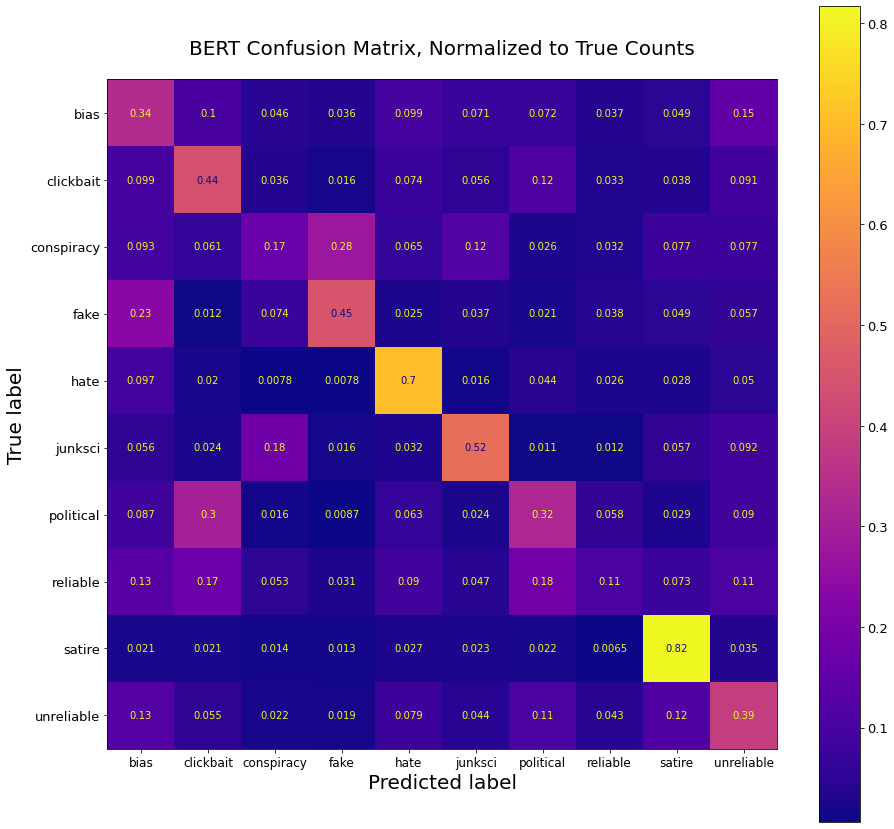

In [3]:

# Load datafile
prediction_results_csv = "BERTlabels.txt"

# labels used for BERT
BERT_labels = ["bias", "clickbait", "conspiracy", "fake", "hate", "junksci", "political", "reliable", "satire", "unreliable"]
BERT_numlabels = []
for i, label in enumerate(BERT_labels):
    BERT_numlabels.append(i)

BERTdata_df = pd.read_csv(prediction_results_csv)
BERT_true_val = BERTdata_df['true']
BERT_predict_val = BERTdata_df['predicted']

# Track the various metrices for each fold
BERT_conf_mat = metrics.confusion_matrix(BERT_true_val, BERT_predict_val, labels=BERT_numlabels, normalize='true').ravel().reshape((len(BERT_numlabels), len(BERT_numlabels)))

# Statistics per label
BERT_label_precisions, BERT_label_recalls, BERT_label_f1s, BERT_label_support = metrics.precision_recall_fscore_support(BERT_true_val, BERT_predict_val, labels=BERT_numlabels, beta=1.0)

# Macro average means "Calculate metrics for each label, and find their unweighted mean.
# This does not take label imbalance into account."
BERT_accuracy = metrics.accuracy_score(BERT_true_val, BERT_predict_val)
BERT_recall = metrics.recall_score(BERT_true_val, BERT_predict_val, average='macro')
BERT_precision = metrics.precision_score(BERT_true_val, BERT_predict_val, average='macro')
BERT_f1 = metrics.f1_score(BERT_true_val, BERT_predict_val, average='macro')

# Display classification report (for last single classifier)
# print(metrics.classification_report(Test_Y, predict_val, target_names=le.classes_))

# Try to model classification report
print(f"Summary Classification Report")
print(f"{' ':12}  {'precision':>12}  {'recall':>12}  {'f1-score':>12}  {'support':>14}")

# Get averages and standard deviations for labels
for i, label in enumerate(BERT_labels):
    precision_str = f"{BERT_label_precisions[i]:04.3f}"
    recall_str = f"{BERT_label_recalls[i]:04.3f}"
    f1_str = f"{BERT_label_f1s[i]:04.3f}"
    support_str = f"{BERT_label_support[i]:6.1f}"
    print(f"{label:12}  {precision_str:12}  {recall_str:12}  {f1_str:12}  {support_str:>14}")
print("")

# Get macro values dumped
totsupport_str = f" "
accuracy_str = f"{BERT_accuracy:04.3f}"
macro_recall_str = f"{BERT_recall:04.3f}"
macro_prec_str = f"{BERT_precision:04.3f}"
macro_f1_str = f"{BERT_f1:04.3f}"

print(f"{'accuracy':12}  {' ':12}  {' ':12}  {accuracy_str:12}  {totsupport_str:>14}")
print(f"{'macro':12}  {macro_prec_str:12}  {macro_recall_str:12}  {macro_f1_str:12}  {totsupport_str:>14}")

# Adjust font sizes (copied from https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot)
size=20
params = {'legend.fontsize': 'large',
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.60,
          'ytick.labelsize': size*0.65,
          'axes.titlepad': 25}
plt.rcParams.update(params)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(15, 15))
disp = metrics.ConfusionMatrixDisplay(BERT_conf_mat, display_labels=BERT_labels)
disp.plot(cmap='plasma', ax=ax)
disp.ax_.set_title(f"BERT Confusion Matrix, Normalized to True Counts")
#plt.clim(0,0.83) # Force same color range as NB confusion matrix
plt.savefig("Final_MulticlassCM_BERT.png", facecolor="w")  # Save PNG with white background



